In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import pandas as pd
import os

In [25]:
imgs_names = os.listdir('./Data/ACGPN_traindata/train_img/')
lable_names = [ x.replace('.jpg', '.png') for x in imgs_names ]

img_path = './Data/ACGPN_traindata/train_img/'
imgs_paths = [ img_path+x for x in imgs_names ]

lable_path = './Data/ACGPN_traindata/train_label/'
lable_paths = [ lable_path+x for x in lable_names ]

df = pd.DataFrame(np.array([imgs_paths, lable_paths]).T, columns=['IMG_PATH', 'LABLE_PATH'])


True
(False, True)
(0, 255)


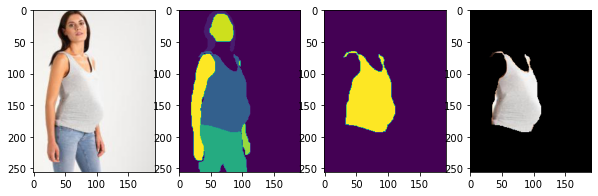

In [224]:
rwIdx = np.random.randint(0, len(df))
rw = df.loc[rwIdx]

rwImg = imread(rw['IMG_PATH'])
rwLable = imread(rw['LABLE_PATH'])

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))
originalShape = list(rwLable.shape)
originalShape.append(1)
ax[1].imshow(rwLable)

newShape = tuple(originalShape)
rwLable = rwLable == 0.015686275
print(rwLable[originalShape[0]//2, originalShape[1]//2])
print((rwLable.min(), rwLable.max()))

maskedImg = (rwImg*rwLable.reshape(newShape)).astype(int)
print((maskedImg.min(), maskedImg.max()))

ax[0].imshow(rwImg)
ax[2].imshow(rwLable)
ax[3].imshow(maskedImg)